## Granger Casuality Test
Used to test whether one time series is useful to predict another time series. 
  

In this part, granger test is used to test if tweet sentiments can be used for predict stock price movement. 



In [2]:
#!pip install statsmodels

In [3]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

In [28]:
df = pd.read_csv("../Data/Combined.csv")
df.head()

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Increase
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Decrease


In [29]:
set(df['Label'])

{'Decrease', 'Increase', 'No Change'}

In [30]:
df = df.replace({'positive':1,'negative':-1,'neutral':0,'Increase':1,'Decrease':-1,'No Change':0})

Plot of stock price and sentiment

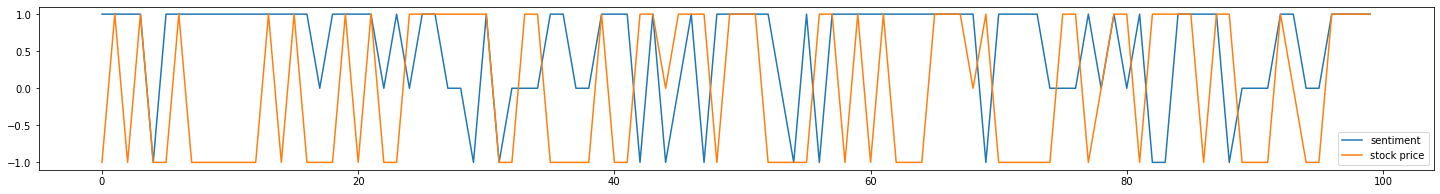

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize = (25,3))
ax.plot(df["sentiment"][:100],label="sentiment")
ax.plot(df["Label"][:100],label="stock price")
ax.legend()

In [32]:
df.sort_values(by='Date')

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label
333,2011-12-01,i made volum model s go now i need work miniat...,0.300000,0.200000,1,1
384,2011-12-21,yeah realli mom attest not sure i handl char m...,0.377273,0.708687,1,-1
390,2011-12-22,model s option perform red black i deliv car j...,0.090476,0.376190,1,1
410,2011-12-28,if ever want know real truth moon land best on...,0.600000,0.300000,1,-1
413,2011-12-29,cool person essay it realli reson i felt way c...,0.132857,0.438571,1,1
...,...,...,...,...,...,...
845,2021-04-09,it remov simul improv render resolut congrat ...,0.048633,0.437346,1,-1
731,2021-04-13,tesla build collis repair capabl help address ...,-0.216667,0.316667,-1,1
734,2021-04-14,th raptor engin come soon mayb use get that ve...,0.052500,0.397500,1,-1
738,2021-04-15,one mani reason need make life multiplanetari ...,0.089066,0.373225,1,-1


Applied the test here: 

Question: If sentiment is predictive of the stock labels?

Null hypothesis: sentiment does not help for predict the stock movement.

Alternative hypothesis: sentiment granger-causes stock movement.

In [33]:
grangercausalitytests(df[['Label','sentiment']],maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1163  , p=0.7331  , df_denom=1418, df_num=1
ssr based chi2 test:   chi2=0.1166  , p=0.7328  , df=1
likelihood ratio test: chi2=0.1166  , p=0.7328  , df=1
parameter F test:         F=0.1163  , p=0.7331  , df_denom=1418, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0720  , p=0.0172  , df_denom=1415, df_num=2
ssr based chi2 test:   chi2=8.1728  , p=0.0168  , df=2
likelihood ratio test: chi2=8.1494  , p=0.0170  , df=2
parameter F test:         F=4.0720  , p=0.0172  , df_denom=1415, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7060  , p=0.0440  , df_denom=1412, df_num=3
ssr based chi2 test:   chi2=8.1581  , p=0.0429  , df=3
likelihood ratio test: chi2=8.1347  , p=0.0433  , df=3
parameter F test:         F=2.7060  , p=0.0440  , df_denom=1412, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0432  , p=0.

{1: ({'ssr_ftest': (0.11631619929956935, 0.7331152562665291, 1418.0, 1),
   'ssr_chi2test': (0.11656228434745278, 0.732793298568778, 1),
   'lrtest': (0.11655750390264075, 0.732798568356765, 1),
   'params_ftest': (0.11631619929922392, 0.7331152562667027, 1418.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.072036063290468, 0.017242767912746503, 1415.0, 2),
   'ssr_chi2test': (8.17284976660419, 0.01679918537550095, 2),
   'lrtest': (8.149420090866442, 0.016997142361582153, 2),
   'params_ftest': (4.072036063290606, 0.017242767912743314, 1415.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.7059503023515004, 0.044039692838961676, 1412.0, 3),
   'ssr_chi2test': (8.158095210418086, 0.04285488940537115, 3),
   'lrtest': (8.134733504004089, 0.04330771222025264, 3),
   'params_ftest': (2.7059503023516007, 0.04403969283895129, 1412.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          

## Conclusion: 
p-value is most significant at lag=3, reject the null hypothesis.
  
The sentiment change is useful for predicting future stock labels. And the delay will be about 2 days.

### (Extra) Granger test in reverse

In [34]:
grangercausalitytests(df[['sentiment',"Label"]],maxlag=7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2232  , p=0.6367  , df_denom=1418, df_num=1
ssr based chi2 test:   chi2=0.2237  , p=0.6362  , df=1
likelihood ratio test: chi2=0.2237  , p=0.6362  , df=1
parameter F test:         F=0.2232  , p=0.6367  , df_denom=1418, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3005  , p=0.2727  , df_denom=1415, df_num=2
ssr based chi2 test:   chi2=2.6102  , p=0.2712  , df=2
likelihood ratio test: chi2=2.6078  , p=0.2715  , df=2
parameter F test:         F=1.3005  , p=0.2727  , df_denom=1415, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0331  , p=0.3769  , df_denom=1412, df_num=3
ssr based chi2 test:   chi2=3.1148  , p=0.3743  , df=3
likelihood ratio test: chi2=3.1113  , p=0.3748  , df=3
parameter F test:         F=1.0331  , p=0.3769  , df_denom=1412, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8552  , p=0.

{1: ({'ssr_ftest': (0.2232423726304187, 0.6366531292808439, 1418.0, 1),
   'ssr_chi2test': (0.2237146766627821, 0.6362239815601125, 1),
   'lrtest': (0.22369706828749258, 0.6362372620332071, 1),
   'params_ftest': (0.22324237263065264, 0.6366531292807251, 1418.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.3004850200981297, 0.2727250197448701, 1415.0, 2),
   'ssr_chi2test': (2.6101607470520767, 0.27115074082864415, 2),
   'lrtest': (2.6077647604834056, 0.27147577224905556, 2),
   'params_ftest': (1.3004850200982134, 0.27272501974489444, 1415.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0331313895316063, 0.37689620977988664, 1412.0, 3),
   'ssr_chi2test': (3.114759437136011, 0.3742677302928258, 3),
   'lrtest': (3.1113459231910383, 0.3747743874653986, 3),
   'params_ftest': (1.033131389531656, 0.37689620977988664, 1412.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

### (Extra) conclusion:
since p-value is not significant in all lags, stock labels do not helpful for predict the sentiment change.